In [1]:
#Downloading the desired data using urlretrieve function
medical_charges='https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1930536ec50>)

In [4]:
import pandas as pd

In [5]:
medical_df = pd.read_csv('medical.csv')

In [6]:
medical_df

age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]

In [7]:
#datatype for each column
#numeric col: age, bmi, children, charges
#categorical cols: sex, smoker, region
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
#Check the statistics in the numerical columns
#The ranges in the columns seem to be reasonable
medical_df.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

## Exploratory Data Analysis 

In [9]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
#settings that improve our charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#### Age

In [11]:
#max_age = 64
#min_age = 18
medical_df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

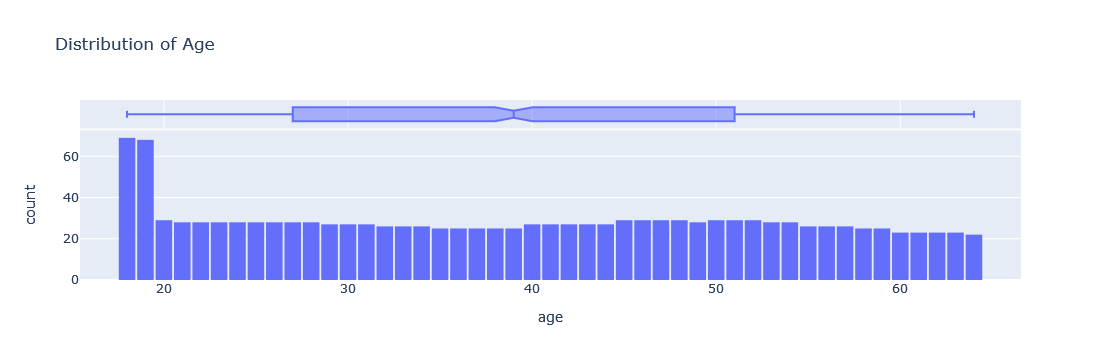

In [12]:
#visualize using a histogram
#forms a uniform distribution
fig = px.histogram(medical_df, x='age', marginal='box',
                  nbins=47, title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

#### BodyMassIndex(BMI)=weight/height

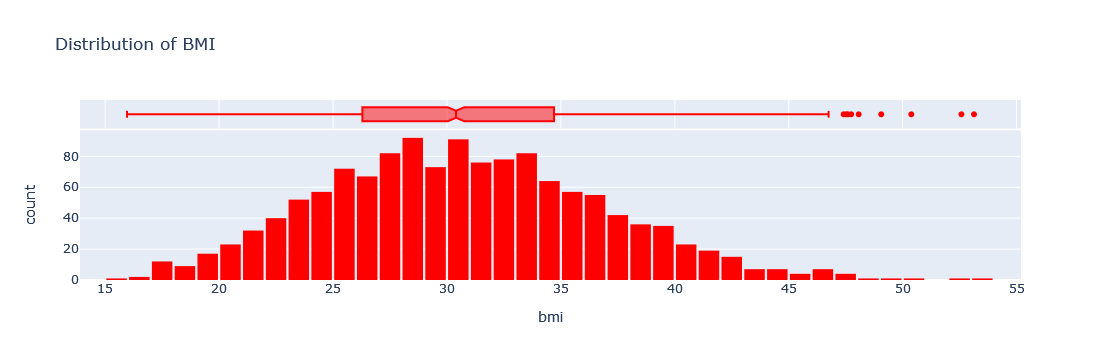

In [13]:
#The measurement forms a Gaussian distribution or normal distribution
fig = px.histogram(medical_df,
                  x='bmi',
                  marginal='box',
                  color_discrete_sequence=['red'],
                  title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

#### charges

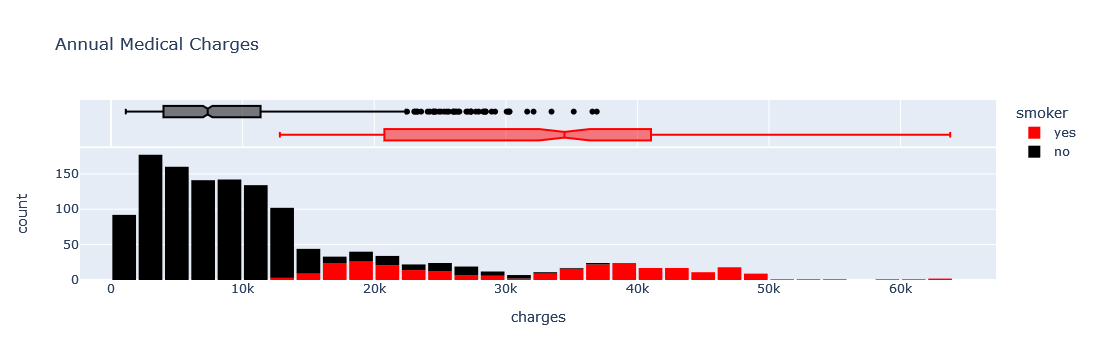

In [14]:
#explanation of the power law
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='smoker',
                  color_discrete_sequence=['red', 'black'],
                  title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

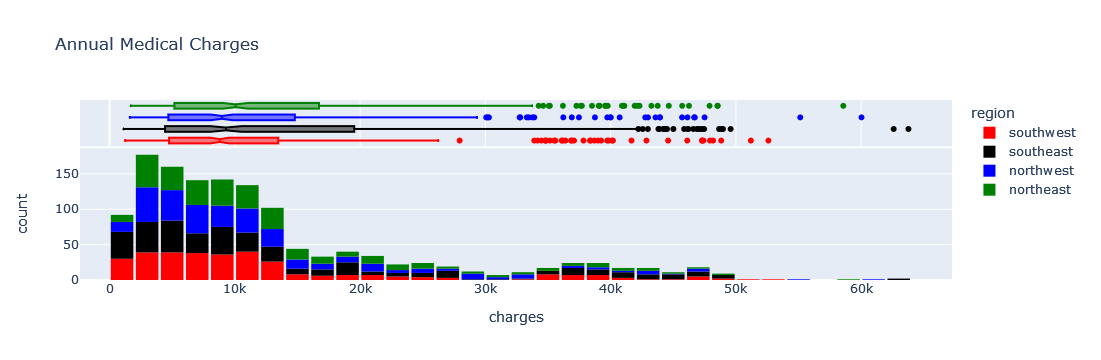

In [15]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='region',
                  color_discrete_sequence=['red', 'black', 'blue', 'green'],
                  title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

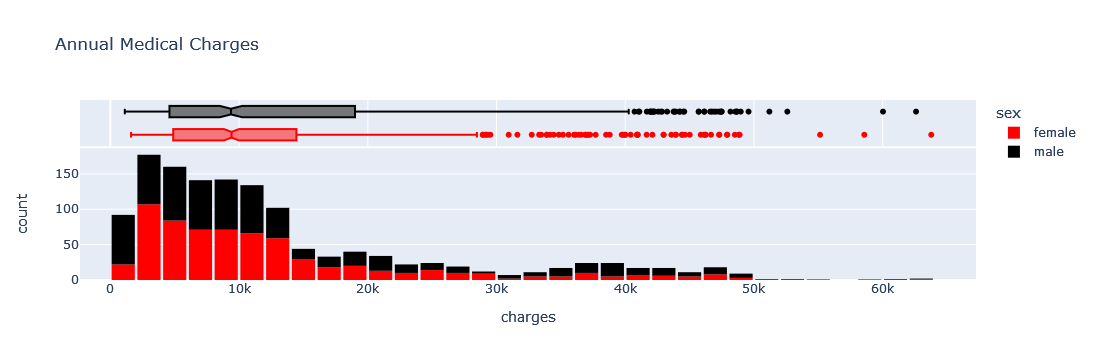

In [16]:
fig = px.histogram(medical_df,
                  x='charges',
                  marginal='box',
                  color='sex',
                  color_discrete_sequence=['red', 'black'],
                  title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

#### Smoker column

In [17]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

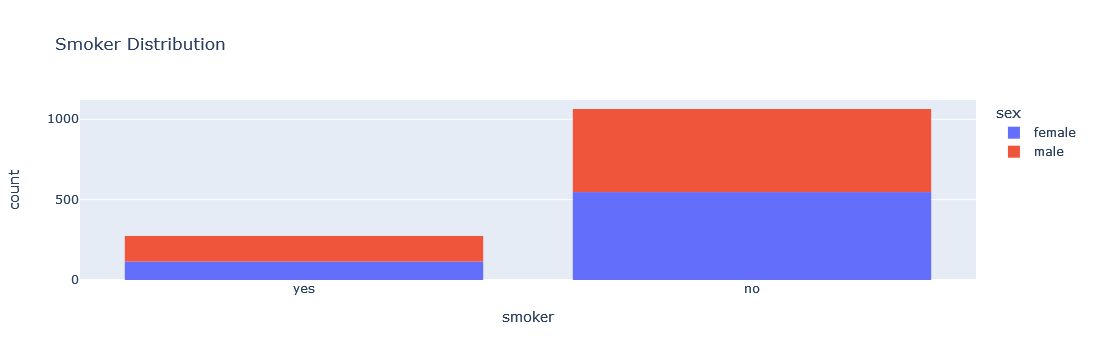

In [18]:
px.histogram(medical_df, x='smoker', color='sex', title='Smoker Distribution')

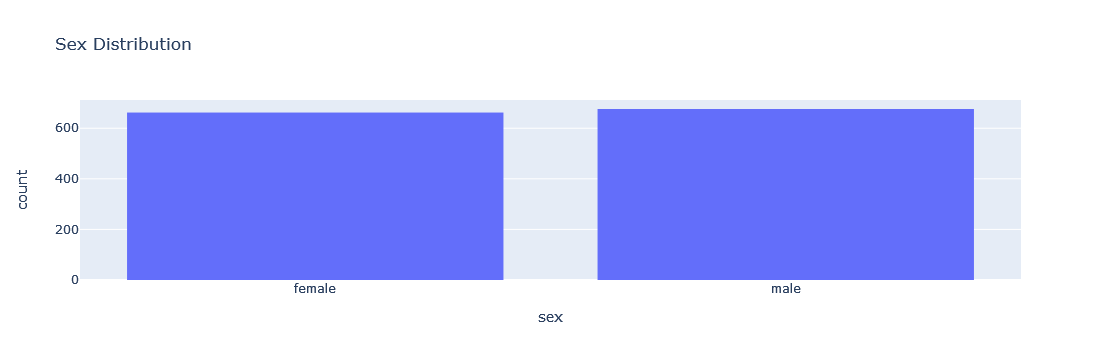

In [19]:
px.histogram(medical_df, x='sex', title='Sex Distribution')

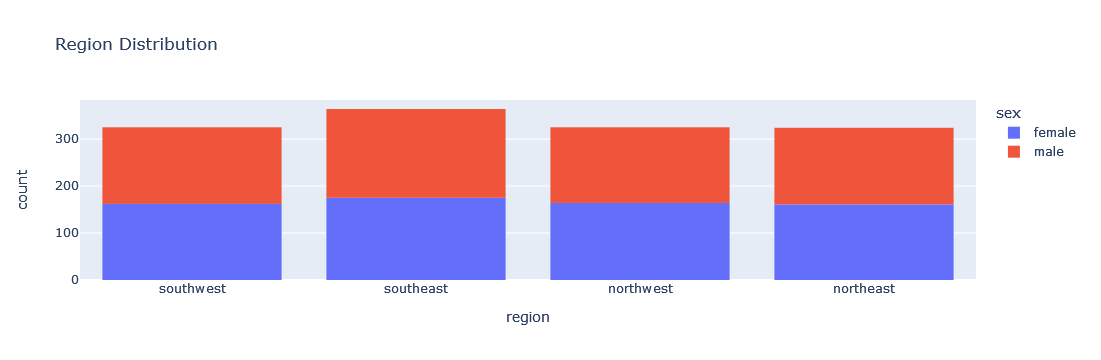

In [20]:
px.histogram(medical_df, x='region', color='sex',title='Region Distribution')

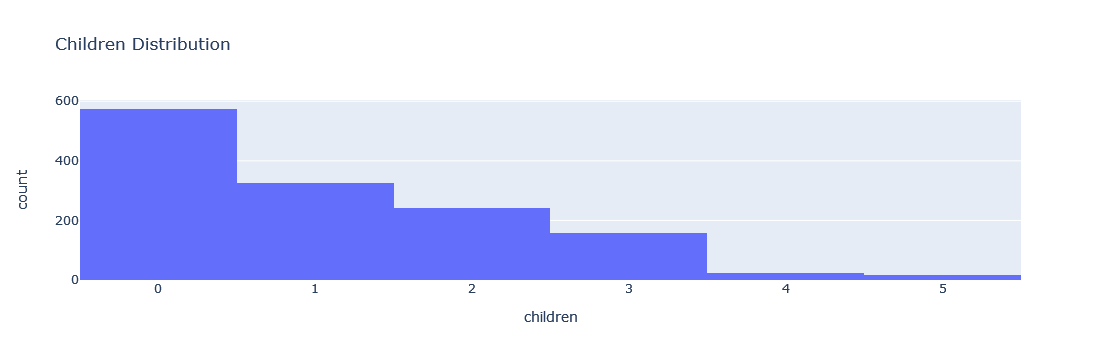

In [21]:
px.histogram(medical_df, x='children',title='Children Distribution')

#### Age and Charges

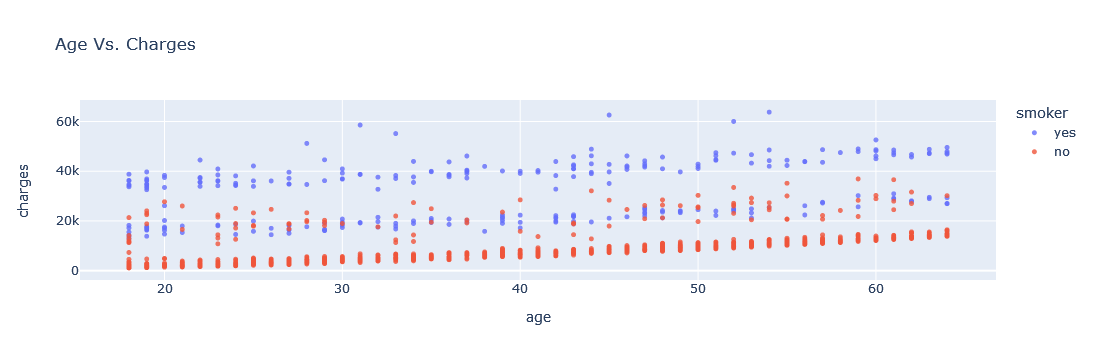

In [22]:
#presents three clusters that appear to have a linear trend
#It is possible that there are two distinct but overlapping clusters: non-smokers 
#with medical issues and smokers with medical issues
#As the age increases the charges too increase
fig = px.scatter(medical_df,
                x='age',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='Age Vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

#### BMI and Charges

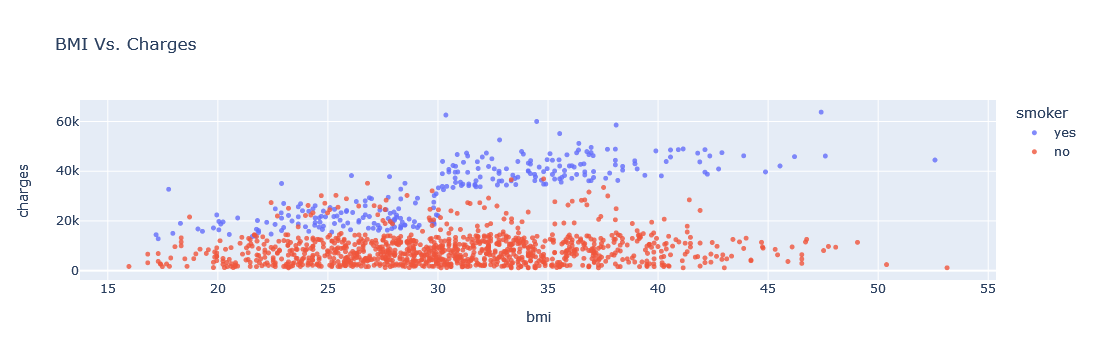

In [23]:
#smoking combined with obesity creates higher charges
#there are two significant clusters below thiry and above thirty for smokers
fig = px.scatter(medical_df,
                x='bmi',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title='BMI Vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

#### Children and Charges

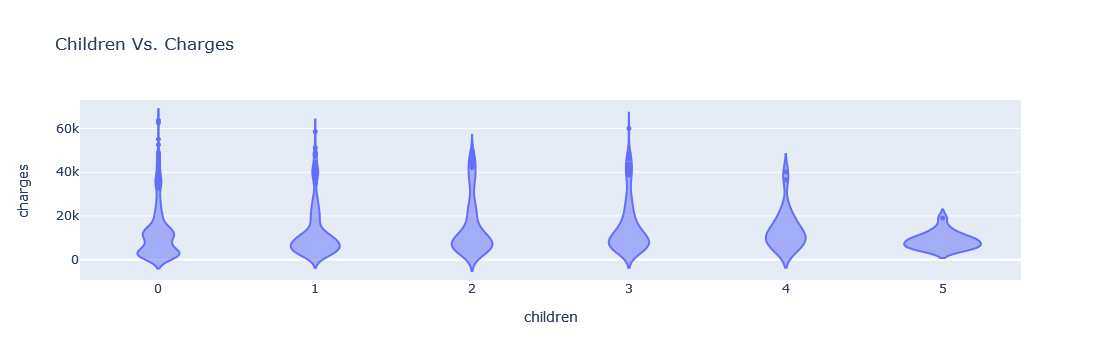

In [24]:
fig = px.violin(medical_df,
                x='children',
                y='charges',
                #color='smoker',
                #opacity=0.8,
                #hover_data=['sex'],
                title='Children Vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

#### Sex and Charges

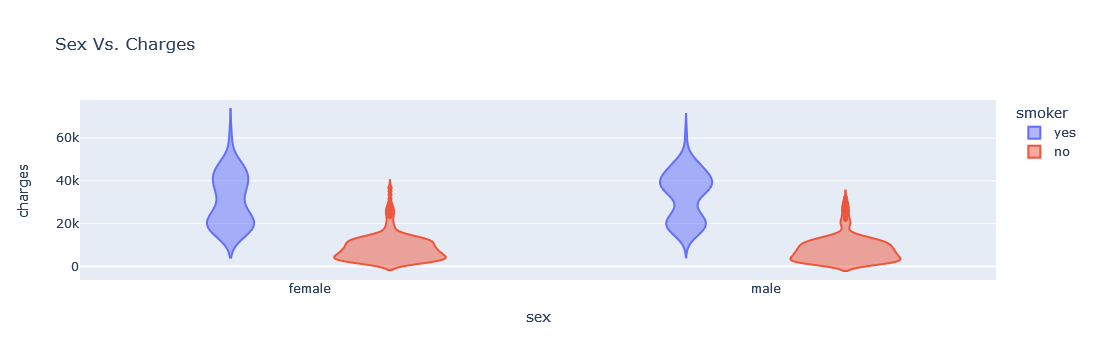

In [25]:
fig = px.violin(medical_df,
                x='sex',
                y='charges',
                color='smoker',
                #opacity=0.8,
                hover_data=['sex'],
                title='Sex Vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

### Correlation

###### The stronger the correlation coefficient/absolute value, the significant the relationship

In [26]:
#This is essential in explaining the relationship between two columns and their 
#statistical significance
#The relationship is expressed numerically using a correlation coefficient
#Strength: -1 or 1 indicates a perfectly linear relationship
#Direction: a sign of the correlation-coefficient

In [27]:
medical_df.charges.corr(medical_df.age)

0.2990081933306477

In [28]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362887

In [29]:
medical_df.charges.corr(medical_df.children)

0.06799822684790481

In [30]:
#for categorical data, convert to numeric data
smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
smoker_numeric

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [31]:
medical_df.charges.corr(smoker_numeric)

0.7872514304984771

### Dangers of Interpreting Y and X, Cause and effect using a correlation matrix
Correlation vs causation fallacy: Note that a high correlation cannot be used to interpret a cause-effect relationship between features. Two features 
𝑋
X and 
𝑌
Y can be correlated if 
𝑋
X causes 
𝑌
Y or if 
𝑌
Y causes 
𝑋
X, or if both are caused independently by some other factor 
𝑍
Z, and the correlation will no longer hold true if one of the cause-effect relationships is broken. It's also possible that 
𝑋
X are 
𝑌
Y simply appear to be correlated because the sample is too small.

While this may seem obvious, computers can't differentiate between correlation and causation, and decisions based on automated system can often have major consequences on society, so it's important to study why automated systems lead to a given result. Determining cause-effect relationships requires human insight.

## Linear Regression using a single feature/variable
#### y=wx+b with w being the slope and b being the intercept

In [32]:
non_smoker = medical_df[medical_df.smoker=='no']

<Axes: title={'center': 'Age vs. Charges'}, xlabel='age', ylabel='charges'>

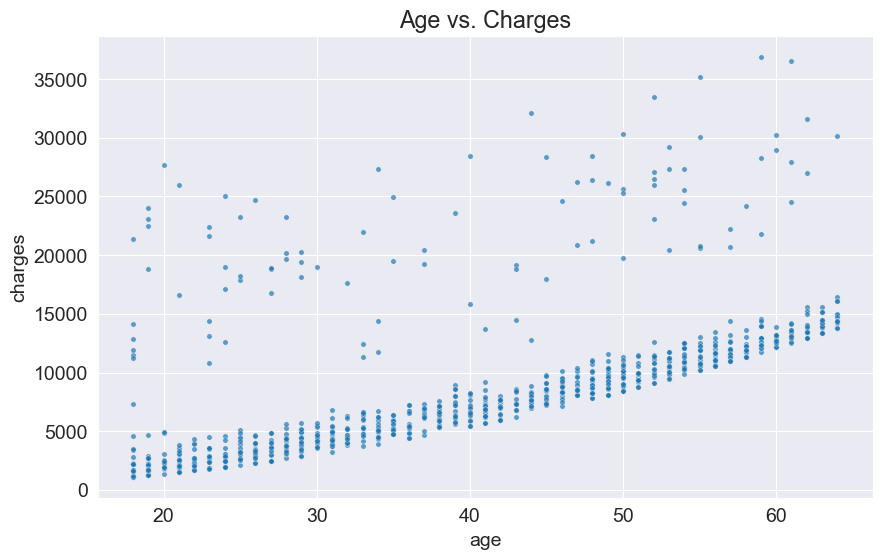

In [33]:
#Visualize the relationship between age and charges
plt.title('Age vs. Charges')
sns.scatterplot(data=non_smoker, x='age', y='charges', alpha=0.7, s=15)

#### model

y=wx+b
charges=w * age + b


In [34]:
#turn the equation into a function that defines the first model
def estimate_charges(age, w, b):
    return w * age + b

In [36]:
#put some values for weight(w) and bias(b) to satisfy the written equation
w =100
b = 70

estimate_charges(30, w, b)

3070

In [38]:
ages = non_smoker.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [40]:
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

1       1870
2       2870
3       3370
4       3270
5       3170
        ... 
1332    5270
1333    5070
1334    1870
1335    1870
1336    2170
Name: age, Length: 1064, dtype: int64

In [41]:
non_smoker.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Charges')

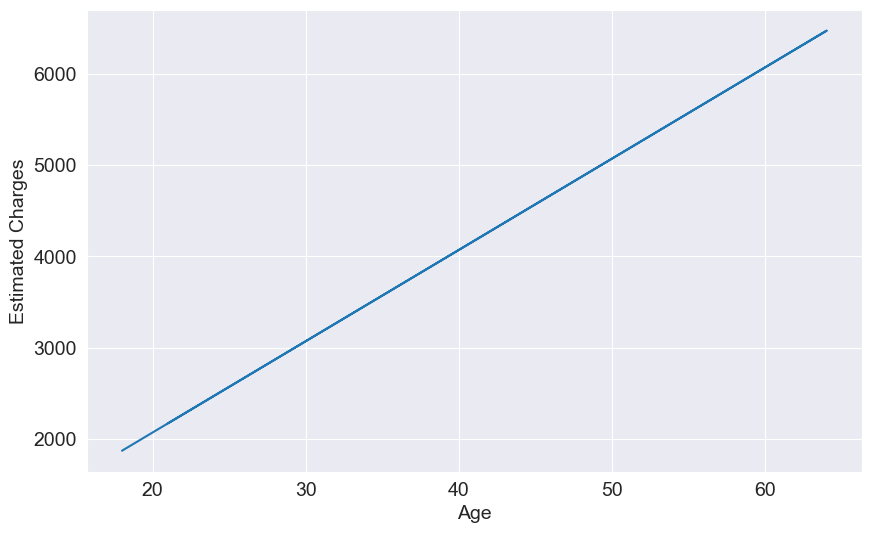

In [43]:
#plot the estimated charges using a line graph
plt.plot(ages, estimated_charges)
plt.xlabel('Age');
plt.ylabel('Estimated Charges')

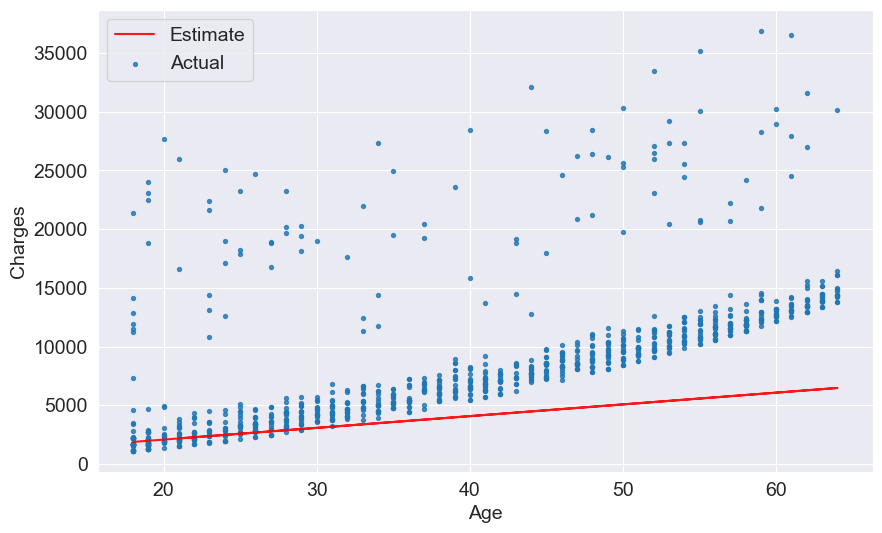

In [46]:
#try to use the line on actual data to see how the designed model fits the data
target = non_smoker.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8, alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimate', 'Actual']);

In [57]:
def TParams(w, b):
    ages= non_smoker.age
    target=non_smoker.charges

    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges');
    plt.legend(['Estimate', 'Actual']);
    plt.show()

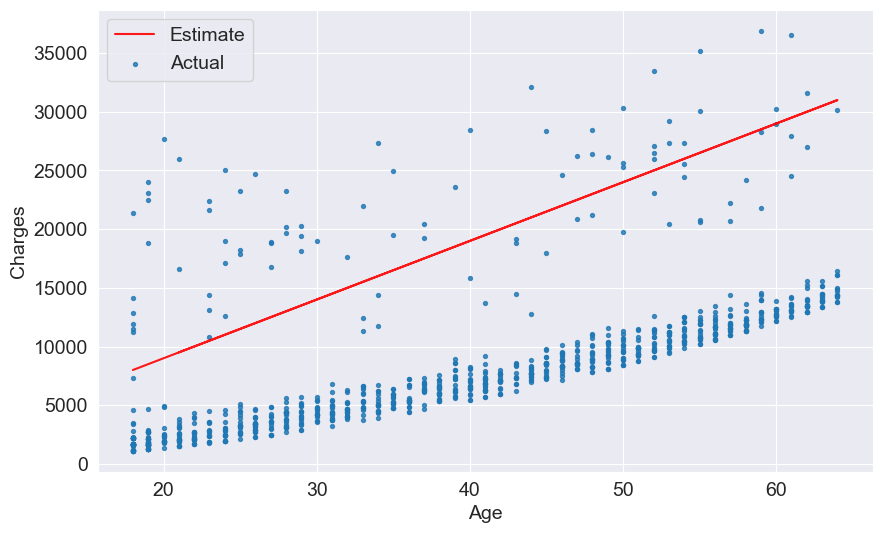

In [64]:
TParams(500,-1000)

### Loss/Cost Function

In [65]:
import numpy as np

We can compare our model's predictions with the actual targets using the following method:

Calculate the difference between the targets and predictions (the differenced is called the "residual")
Square all elements of the difference matrix to remove negative values.
Calculate the average of the elements in the resulting matrix.
Take the square root of the r

Root mean Squared Error(RMSE): how far we are from the line
esult

In [67]:
target = non_smoker.charges
target

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [68]:
predictions = estimated_charges
predictions

1       1870
2       2870
3       3370
4       3270
5       3170
        ... 
1332    5270
1333    5070
1334    1870
1335    1870
1336    2170
Name: age, Length: 1064, dtype: int64

In [69]:
def rmse(target, predictions):
    return np.sqrt(np.mean(np.square(target-predictions)))

In [70]:
#using a sample set of weights to compute rmse
w = 48
b = 120

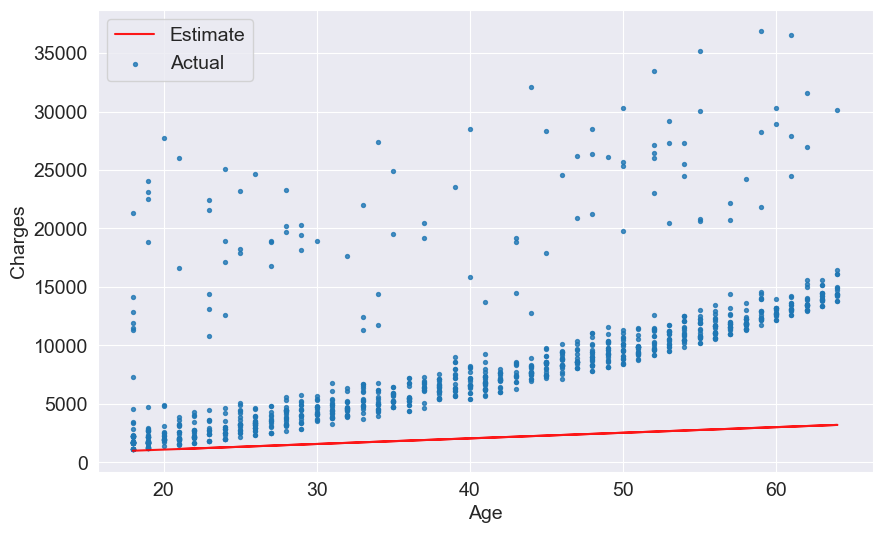

In [71]:
TParams(w, b)

In [74]:
target = non_smoker.charges
predicted = estimate_charges(non_smoker.age, w, b)

In [75]:
#on average, each element in the prediction differs from the actual target by $8516.41
#This result is a loss since it  shows how bad the model is predicting the target variables
#it represents information loss in the model: 
#The lower the loss, the better the model
rmse(target, predicted)

8516.406790262816

In [76]:
def Tparam(w, b):
    ages = non_smoker.age
    target = non_smoker.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print('RMSE Loss: ', loss)
    
    

RMSE Loss:  4762.591749535326


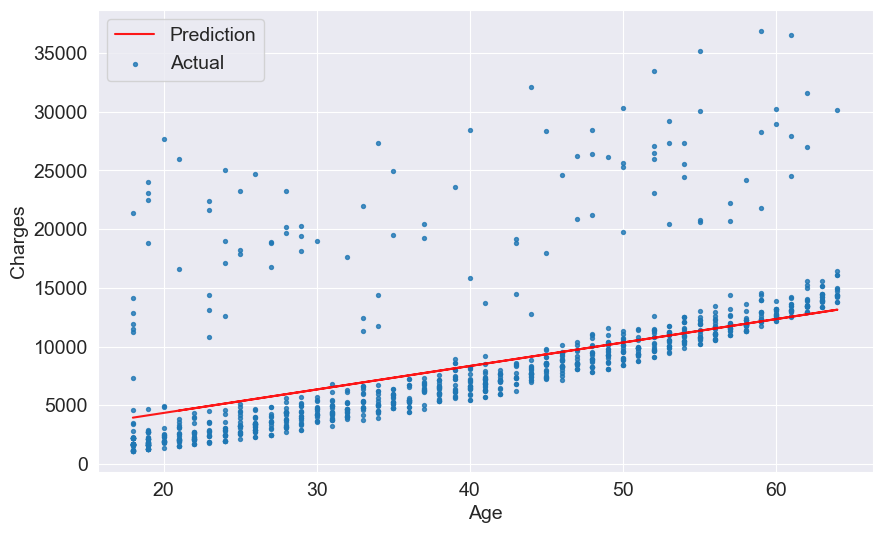

In [97]:
Tparam(200, 340)

### Optimizer

Next, we need a strategy to modify weights w and b to reduce the loss and improve the "fit" of the line to the data.

Ordinary Least Squares: https://www.youtube.com/watch?v=szXbuO3bVRk (better for smaller datasets)(linear algebra and discrete math)
Stochastic gradient descent: https://www.youtube.com/watch?v=sDv4f4s2SB8 (better for larger datasets)

Both of these have the same objective: to minimize the loss, however, while ordinary least squares directly computes the best values for w and b using matrix operations, while gradient descent uses a iterative approach, starting with a random values of w and b and slowly improving them using derivatives.

## Linear Regression using Scikit-learn

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
model = LinearRegression()

In [100]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [101]:
inputs = non_smoker[['age']]
targets = non_smoker.charges
print('input.shape: ', inputs.shape)
print('targets.shape: ', targets.shape)

input.shape:  (1064, 1)
targets.shape:  (1064,)


In [102]:
model.fit(inputs, targets)

LinearRegression()

In [103]:
# make predictions
model.predict(np.array([[24],
                      [45],
                      [60]]))

C:\Users\NjeriWanjiru\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4322.55335138,  9934.78052084, 13943.51421331])

In [105]:
predictions =model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [106]:
inputs

age
1      18
2      28
3      33
4      32
5      31
...   ...
1332   52
1333   50
1334   18
1335   18
1336   21

[1064 rows x 1 columns]

In [107]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [108]:
#4662 dollars off on average
rmse(targets, predictions)

4662.505766636395

In [110]:
#weight(w) = coef
#bias(b) = intercept
model.coef_


array([267.24891283])

In [111]:
model.intercept_

-2091.420556565079

RMSE Loss:  4662.505766636395


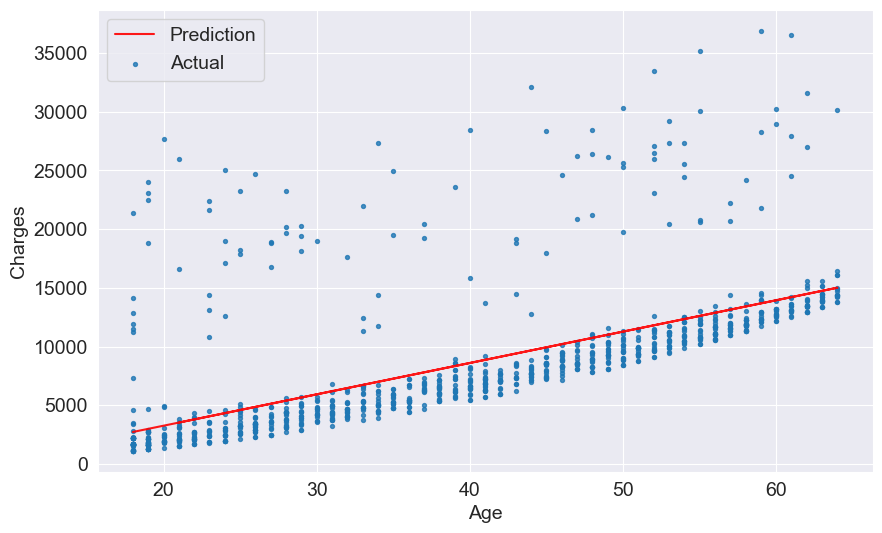

In [113]:
Tparam(model.coef_, model.intercept_)

In [114]:
#Using SGDRegressor 
from sklearn.linear_model import SGDRegressor 

In [120]:
model = SGDRegressor()

In [121]:
inputs = non_smoker[['age']]
targets = non_smoker.charges
print('input.shape: ', inputs.shape)
print('targets.shape: ', targets.shape)

input.shape:  (1064, 1)
targets.shape:  (1064,)


In [122]:
model.fit(inputs, targets)

SGDRegressor()

In [123]:
model.predict(inputs)

array([3741.535808  , 5743.52274254, 6744.51620981, ..., 3741.535808  ,
       3741.535808  , 4342.13188836])

In [124]:
targets

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [125]:
model.coef_

array([200.19869345])

In [126]:
model.intercept_

array([137.95932581])

RMSE Loss:  4774.83814033784


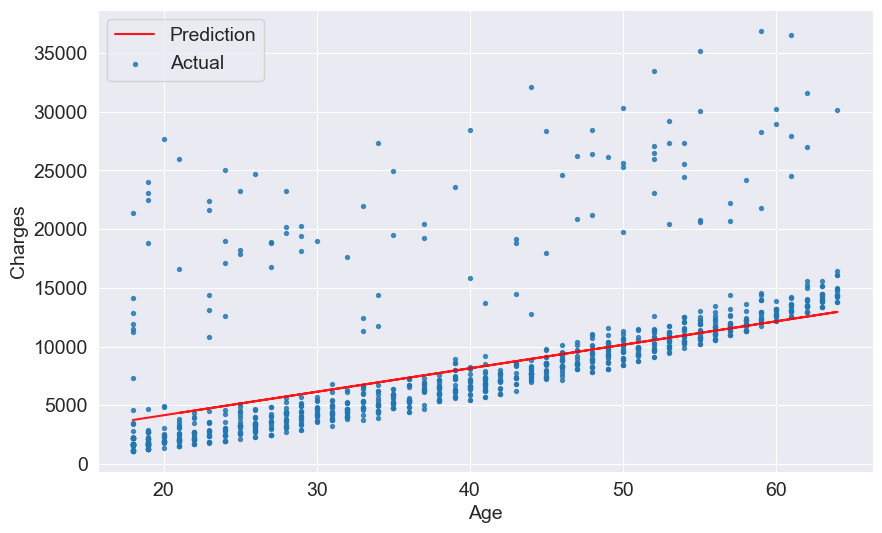

In [127]:
#$4774 dollars on average 
Tparam(model.coef_, model.intercept_)

In [128]:
Y_smoker = medical_df[medical_df.smoker =='yes']

In [129]:
def estimate_charges2(age, w, b):
    return w * age + b

In [139]:
ages = Y_smoker.age
estimated_charges = estimate_charges2(ages, w, b)

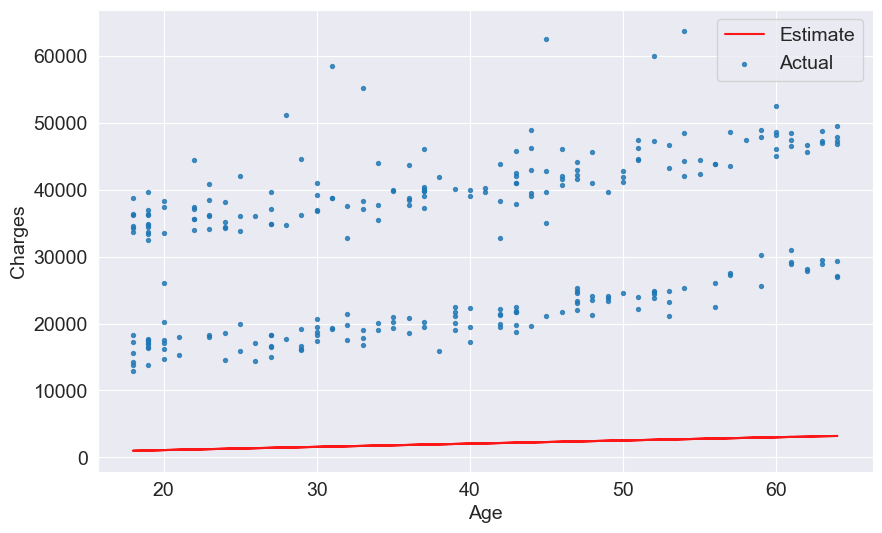

In [140]:
target = Y_smoker.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8, alpha=0.8);
plt.xlabel('Age');
plt.ylabel('Charges');
plt.legend(['Estimate', 'Actual']);

In [166]:
def rmse(target, predictions):
    return np.sqrt(np.mean(np.square(target-predictions)))

In [169]:
def Tparams(w, b):
    ages = Y_smoker.age
    target = Y_smoker.charges

    estimated_charges = estimate_charges2(ages, w, b)
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8, alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges');
    plt.legend(['Estimate', 'Actual']);

    # loss = rmse(target, predictions)
    # print('RMSE Loss: ', loss)

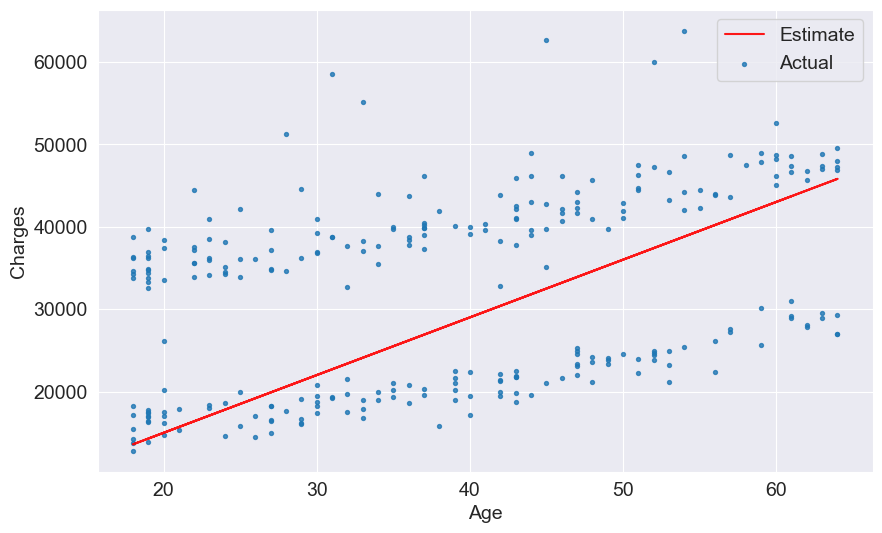

In [170]:
Tparams(700, 1000)

In [155]:
from sklearn.linear_model import LinearRegression

In [151]:
model2 = LinearRegression()

In [156]:
model2

LinearRegression()

In [157]:
inputs = Y_smoker[['age']]
targets = Y_smoker.charges
print('input.shape: ', inputs.shape)
print('targets.shape: ', targets.shape)

input.shape:  (274, 1)
targets.shape:  (274,)


In [158]:
model2.fit(inputs, targets)

LinearRegression()

In [160]:
model2.predict(inputs)

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [161]:
model2.coef_

array([305.23760211])

In [162]:
model2.intercept_

20294.12812691597

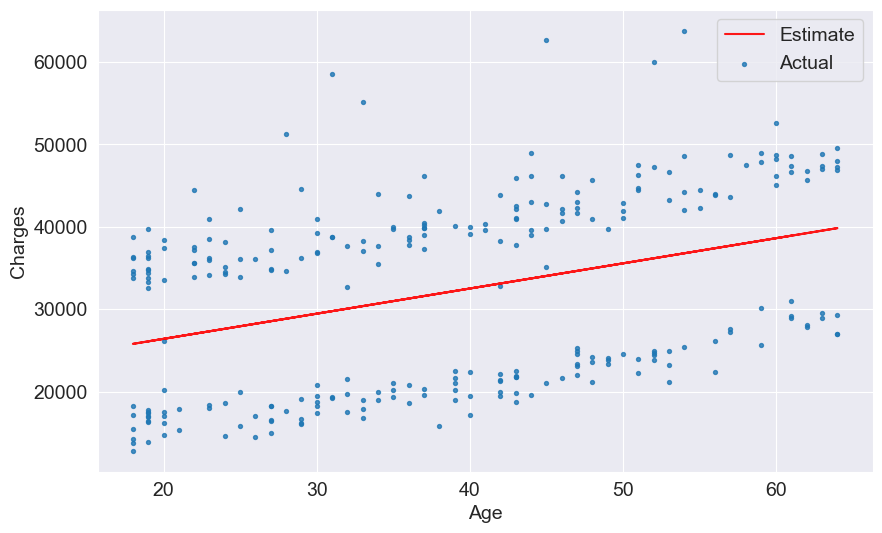

In [171]:
Tparams(model2.coef_, model2.intercept_)

# Machine learning

#The main componenets include

1. model
2. cost function
3. Optimizer

   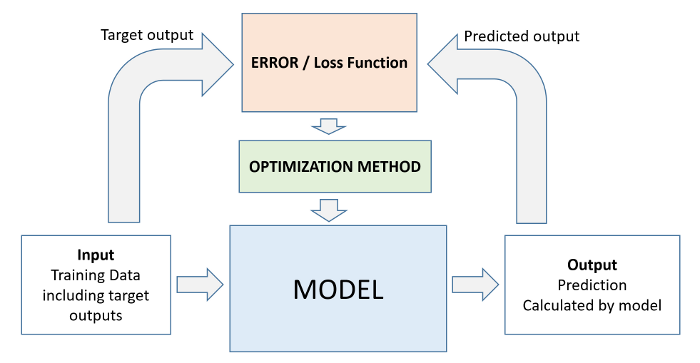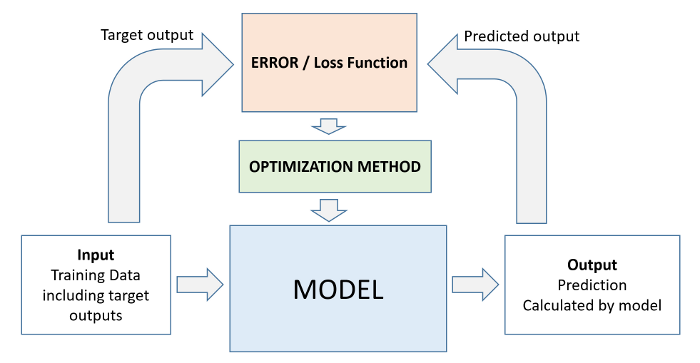

In [174]:
# Create inputs and targets
inputs, targets = non_smoker[['age']], non_smoker['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


# Linear Regression using multiple features/variables/inputs

charges = w1 * age + w2 * bmi + b

In [176]:
# Create inputs and targets
inputs, targets = non_smoker[['age', 'bmi']], non_smoker['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.3128354612945


In [178]:
non_smoker.charges.corr(non_smoker.bmi)

0.08403654312833272

In [179]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), -2293.6320906488654)

In [180]:
# Create inputs and targets
inputs, targets = non_smoker[['bmi']], non_smoker['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 5969.772531913293


In [184]:
# Create inputs and targets
inputs, targets = non_smoker[['age', 'bmi', 'children']], non_smoker['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)
    

Loss: 4608.470405038246


In [185]:
# Create inputs and targets
inputs, targets = Y_smoker[['age', 'bmi', 'children']], Y_smoker['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 5718.202480524155


In [186]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 11355.317901125973


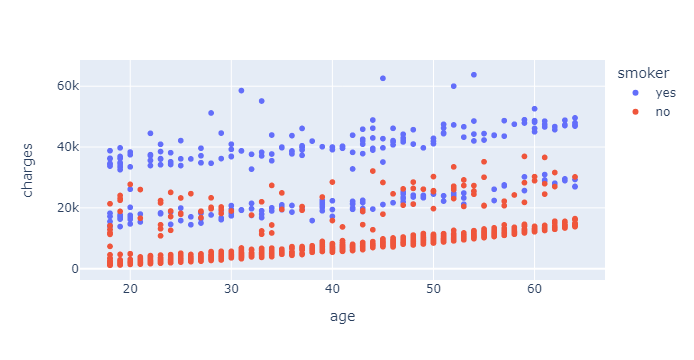

In [187]:
px.scatter(medical_df, x='age', y='charges', color='smoker')

## Use Categorical features for Machine Learning

To use the categorical columns, we simply need to convert them to numbers. There are three common techniques for doing this:
1. 
If a categorical column has just two categories (it's called a binary category), then we can replace their values wi
   h 0 and 
12. .
If a categorical column has more than 2 categories, we can perform one-hot encoding i.e. create a new column for each category with 1s and 
03. s.
If the categories have a natural order (e.g. cold, neutral, warm, hot), then they ca
    be converted to numbers (e.g. 1, 2, 3, 4) preserving the order. These are called ordinals

#### Binary Categories

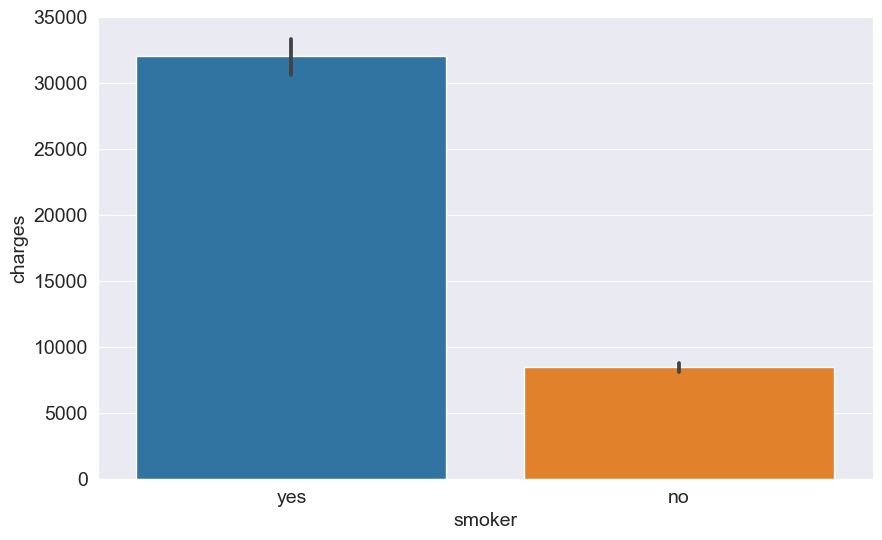

In [188]:
sns.barplot(data=medical_df, x='smoker', y='charges');

In [190]:
smoker_code = {'no': 0, 'yes':1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_code)

In [191]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  
0               1  
1               0  
2               0  
3               0  
4               0  
...           ...  
1333            0  
1334            0  
1335            0  
1336            0  
1337            1  

[1338 rows x 8 columns]

In [192]:
medical_df.charges.corr(medical_df.smoker_code)

0.7872514304984771

In [194]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6056.439217188081


In [195]:
# The loss is reduced which is a good thing: always include categorical data

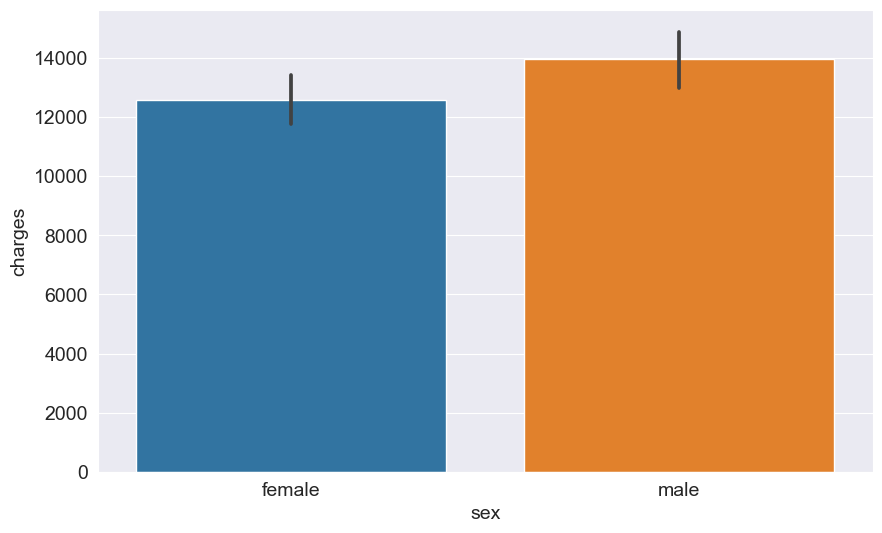

In [196]:
sns.barplot(data=medical_df, x='sex', y='charges');

In [200]:
sex_code = {'female': 0, 'male':1}
medical_df['sex_code'] = medical_df.sex.map(sex_code)

In [201]:
medical_df.charges.corr(medical_df.sex_code)

0.05729206220202536

In [202]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

#hardly any change

Loss: 6056.100708754546


### One-hot encoding


### One-hot Encoding

The "region" column contains 4 values, so we'll need to use hot encoding and create a new column for each region.

![](https://i.imgur.com/n8GuiOO.png)

<Axes: xlabel='region', ylabel='charges'>

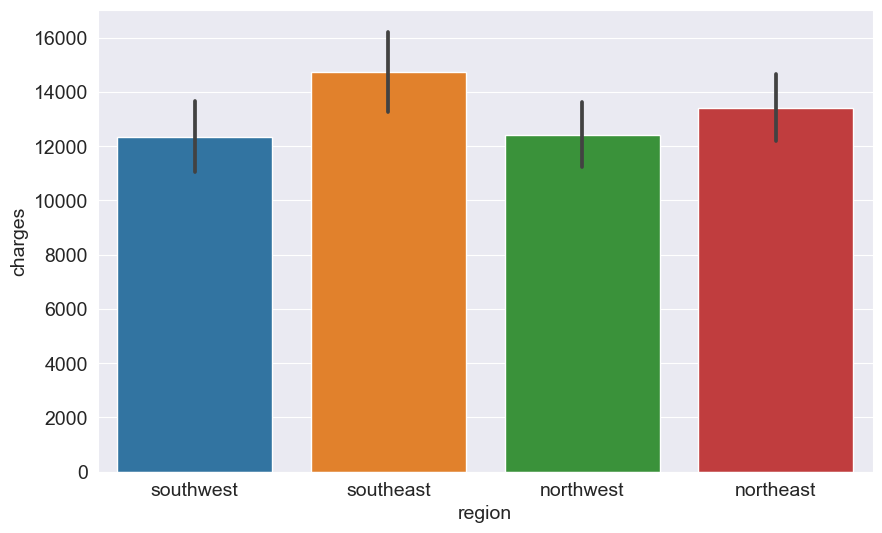

In [203]:
sns.barplot(data=medical_df, x='region', y='charges')

In [205]:
from sklearn import preprocessing
encode = preprocessing.OneHotEncoder()
encode.fit(medical_df[['region']])
encode.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [207]:
one_hot = encode.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [208]:
medical_df[['NE', 'NW', 'SE', 'SW']] = one_hot

In [209]:
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code   NE   NW   SE   SW  
0               1         0  0.0  0.0  0.0  1.0  
1               0         1  0.0  0.0  1.0  0.0  
2               0         1  0.0  0.0  1.0  0.0  
3               0         1  0.0  1.0  0.0  0.0  
4               0         1  0.0  1.0  0.0  0.0  
...           ...       ...  ...  ...  ...  ...  
1333            0         1  0.0  1.0  0.0  0.0  
1334            0         0  1.0  0.0  0.0  0.0  
1335            0         0  0.0  0.0  1.0  0.0  
1336            0         0  0.0  0.0  0.0  1.0  
1337            1         0  0.0  1.0  0.0  0.0  

[1338 rows x 13 columns]

In [210]:
# Create inputs and targets
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'NE', 'NW', 'SE', 'SW']], medical_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

#only a slight change about 12 dollars

Loss: 6041.679651174452


#### Model Improvements

In [217]:
pd.DataFrame(model.coef_)

0
0    256.856353
1    339.193454
2    475.500545
3  23848.534542
4   -131.314359
5    587.009235
6    234.045336
7   -448.012814
8   -373.041756

In [212]:
model.intercept_

-12525.54781119544

We can't compare the weights of different column to identify which features are important
A column with a larger range of inputs may disproportionately affect the loss and dominate the optimization process.

In [218]:
#Conducting standardization
medical_df

age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_code  sex_code   NE   NW   SE   SW  
0               1         0  0.0  0.0  0.0  1.0  
1               0         1  0.0  0.0  1.0  0.0  
2               0         1  0.0  0.0  1.0  0.0  
3               0         1  0.0  1.0  0.0  0.0  
4               0         1  0.0  1.0  0.0  0.0  
...           ...       ...  ...  ...  ...  ...  
1333            0         1  0.0  1.0  0.0  0.0  
1334            0         0  1.0  0.0  0.0  0.0  
1335            0         0  0.0  0.0  1.0  0.0  
1336            0         0  0.0  0.0  0.0  1.0  
1337            1         0  0.0  1.0  0.0  0.0  

[1338 rows x 13 columns]

In [219]:
from sklearn.preprocessing import StandardScaler

In [221]:
numeric_cols =['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [222]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [223]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

In [224]:
#scale the data
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [225]:
#These can now we combined with the categorical data

cat_cols = ['smoker_code', 'sex_code', 'NE', 'NW', 'SE', 'SW']
categorical_data = medical_df[cat_cols].values

In [229]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
target = medical_df.charges

#create and train the model
model=LinearRegression().fit(inputs, targets)

#Generate predictions
prediction = model.predict(inputs)

#compute loss
loss = rmse(targets, predictions)
print('Loss is: ', loss)

Loss is:  6041.679651174452


In [230]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

feature        weight
3  smoker_code  23848.534542
9            1   8466.483215
0          age   3607.472736
1          bmi   2067.691966
5           NE    587.009235
2     children    572.998210
6           NW    234.045336
4     sex_code   -131.314359
8           SW   -373.041756
7           SE   -448.012814

In [231]:
new_clients = [[34, 56, 2, 1, 0, 0, 1, 0, 0.]]

In [234]:
scaler.transform([[34, 56, 2]])

C:\Users\NjeriWanjiru\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([[-0.37074641,  4.15632989,  0.75107928]])

In [236]:
model.predict([[-0.37074641,  4.15632989,  0.75107928, 1, 0, 0, 1, 0, 0.]])

array([40235.98253073])

the loss

### How to Approach a Machine Learning Problem

Here's a strategy you can apply to approach any machine learning problem:

1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for the problem at hand
3. Scale numeric variables and one-hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

We'll apply this process to several problems in future tutorials.

#### Creating a Test set

In [237]:
from sklearn.model_selection import train_test_split

In [239]:
inputs_train, inputs_test, target_train, target_test=train_test_split(inputs, target, test_size=0.1)

In [241]:
#Create and train the model
model = LinearRegression().fit(inputs_train, target_train)

#Generate predictions
predictions_test = model.predict(inputs_test)

#Compute the loss to evaluate the model
loss = rmse(target_test, predictions_test)
print('Test Loss: ', loss)

Test Loss:  6170.831606083033


In [243]:
predictions_train = model.predict(inputs_train)

loss = rmse(target_train, predictions_train)
print('Training Loss: ', loss)


#The score on the test set is always going to be higher than the score
#on the training set, because, the model has not seen the test set examples

Training Loss:  6031.48959324049


# Logistic regression 